In [2]:
import torch
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
dtype = torch.float
device = torch.device("cpu")

tensor([-3.1416, -3.1384, -3.1353,  ...,  3.1353,  3.1384,  3.1416])


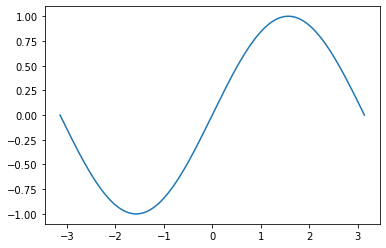

In [4]:
x = torch.linspace(-np.pi, np.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

print(x)
plt.plot(x,y)

In [30]:
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

In [31]:
learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    #loss = (y_pred - y).pow(2).sum().item()
    loss = ((y_pred - y)**2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 1950.3134765625
199 1370.67041015625
299 964.568115234375
399 679.888916015625
499 480.219482421875
599 340.10296630859375
699 241.72927856445312
799 172.63101196289062
899 124.07441711425781
999 89.9389419555664
1099 65.93205261230469
1199 49.042083740234375
1299 37.155147552490234
1399 28.786415100097656
1499 22.892820358276367
1599 18.74103546142578
1699 15.815486907958984
1799 13.753456115722656
1899 12.299699783325195
1999 11.274555206298828
Result: y = 0.05138910561800003 + 0.8470034599304199 x + -0.008865474723279476 x^2 + -0.09194532781839371 x^3


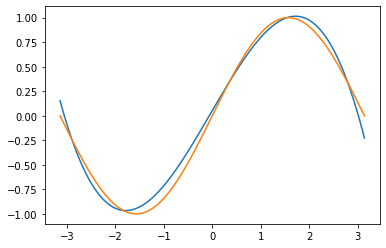

In [32]:

y_pred = a + b * x + c * x ** 2 + d * x ** 3
plt.plot(x,y_pred)
plt.plot(x,y)

In [33]:
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 288.7465515136719
199 198.96453857421875
299 138.1241912841797
399 96.84913635253906
499 68.81712341308594
599 49.75798797607422
699 36.78500747680664
799 27.94478988647461
899 21.913862228393555
999 17.794797897338867
1099 14.978263854980469
1199 13.050162315368652
1299 11.728717803955078
1399 10.822050094604492
1499 10.19923210144043
1599 9.770926475524902
1699 9.476055145263672
1799 9.272817611694336
1899 9.13259220123291
1999 9.035738945007324
Result: y = -0.013069146312773228 + 0.8488361835479736 x + 0.002254644874483347 x^2 + -0.09220601618289948 x^3


In [65]:
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)    

loss_fn = torch.nn.MSELoss(reduction='sum')

model(xx).size()
for p in model.parameters():
    print(p)

model[1]

Parameter containing:
tensor([[-0.5620, -0.4390, -0.3159]], requires_grad=True)
Parameter containing:
tensor([0.1709], requires_grad=True)


Flatten(start_dim=0, end_dim=1)

In [66]:
learning_rate = 1e-6
for t in range(2000):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(xx)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]


# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 1338.61767578125
199 889.8291625976562
299 592.5763549804688
399 395.66998291015625
499 265.21942138671875
599 178.78482055664062
699 121.50655364990234
799 83.54434967041016
899 58.37987518310547
999 41.696258544921875
1099 30.633359909057617
1199 23.2960262298584
1299 18.428752899169922
1399 15.199326515197754
1499 13.056144714355469
1599 11.633487701416016
1699 10.688867568969727
1799 10.061470031738281
1899 9.644676208496094
1999 9.367691040039062
Result: y = 0.007542040664702654 + 0.8350096940994263 x + -0.0013011278351768851 x^2 + -0.09023932367563248 x^3


In [25]:
linear_layer.weight

Parameter containing:
tensor([[ 8.5119e-01,  5.5141e-04, -9.2541e-02]], requires_grad=True)

In [67]:
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)
loss_fn = torch.nn.MSELoss(reduction='sum')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use RMSprop; the optim package contains many other
# optimization algorithms. The first argument to the RMSprop constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
for t in range(2000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(xx)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()
    #linear_layer = model[0]
    #print(linear_layer.weight)


linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 1779.35009765625
199 1536.7685546875
299 1379.56494140625
399 1199.8780517578125
499 1015.548583984375
599 840.2744750976562
699 680.6121826171875
799 538.8278198242188
899 415.4414367675781
999 310.0422668457031
1099 222.3717041015625
1199 151.79037475585938
1299 97.4468765258789
1399 58.039894104003906
1499 31.95328140258789
1599 17.243749618530273
1699 10.870000839233398
1799 9.145027160644531
1899 8.925615310668945
1999 8.912422180175781
Result: y = 0.0005000998498871922 + 0.8561884760856628 x + 0.000500100723002106 x^2 + -0.09379447251558304 x^3


In [68]:
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)
loss_fn = torch.nn.MSELoss(reduction='sum')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use RMSprop; the optim package contains many other
# optimization algorithms. The first argument to the RMSprop constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
for t in range(2000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(xx)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()
    #linear_layer = model[0]
    #print(linear_layer.weight)


linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 34756.6328125
199 17173.283203125
299 7726.94580078125
399 2979.353515625
499 1125.5074462890625
599 675.9822387695312
699 593.1176147460938
799 530.1088256835938
899 451.720947265625
999 363.0127258300781
1099 274.8128967285156
1199 196.20204162597656
1299 131.61856079101562
1399 82.18586730957031
1499 47.311126708984375
1599 25.411396026611328
1699 14.056614875793457
1799 9.824612617492676
1899 9.151552200317383
1999 8.946008682250977
Result: y = -0.0005364537355490029 + 0.8558159470558167 x + -0.0005367001285776496 x^2 + -0.09260445833206177 x^3


In [20]:
model = torch.nn.Sequential(
    torch.nn.Linear(1, 10),
    torch.nn.SELU(),
    torch.nn.Linear(10,10),
    torch.nn.SELU(),
    #torch.nn.Linear(20,10),
    #torch.nn.SELU(),
    torch.nn.Linear(10,1),
    torch.nn.Flatten(0, 1)
)

In [21]:
x = torch.linspace(-np.pi, np.pi, 2000, device=device, dtype=dtype)
x = torch.reshape(x,(2000,1))
x.size()
y_pred = model(x)
#x.reshape(-1,1)
y.size()
tot_par = sum([param.nelement() for param in model.parameters()])
loss_fn = torch.nn.MSELoss(reduction='sum')
loss = loss_fn(y_pred,y)
loss.item()

829.6521606445312

In [24]:
learning_rate = 1e-4
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
for t in range(1200):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 50:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()
    #linear_layer = model[0]
    #print(linear_layer.weight)

50 4.885142803192139
150 3.148648977279663
250 2.2427055835723877
350 1.628280520439148
450 1.2170699834823608
550 0.9394782781600952
650 0.7449581623077393
750 0.6008768081665039
850 0.48695164918899536
950 0.3977956771850586
1050 0.32961568236351013
1150 0.27630722522735596


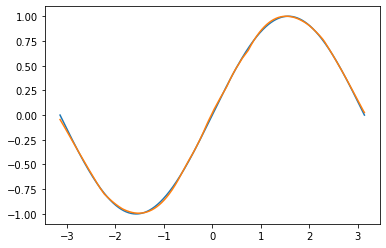

In [25]:
x_p = x = torch.reshape(x,(2000,1))
y_pred = model(x)
y_p = y_pred.detach().numpy()
x_p = x.detach().numpy().reshape(-1,)
plt.plot(x,y)
plt.plot(x_p,y_p)